In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
from torch.utils.data import Dataset



<h3>Datasets and Dataloaders</h3>
<h4>Dataset stores samples and corresponding labels. Dataloader wraps an iterable around Dataset to enable easy access to samples </h4>

In [2]:
training_data = datasets.FashionMNIST(
                root = 'data',
                train = True,
                download = True,
                transform = ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
test_data = datasets.FashionMNIST(
            root = 'data',
            train = False,
            download = True,
            transform = ToTensor()
            )

In [4]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [16]:
training_data


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

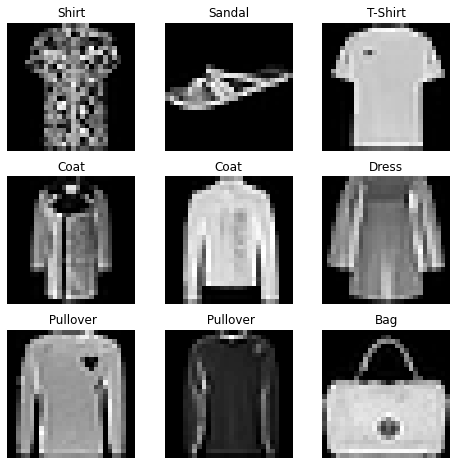

In [22]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: ' Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

figure = plt.figure(figsize = (8,8))
cols, rows = 3,3
for i in range(1,cols*rows+1):
    sample_idx = torch.randint(len(training_data), size =(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

<h3>Custom Dataset must implement three functions: __init__, __len__, __getitem__ </h3>

In [24]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform = None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path) #read_image converts image to tensor
        label = self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label =self.target_transform(label)
        return image,label
        
    

In [26]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle=True)

In [31]:
train_features, train_labels = next(iter(train_dataloader))
print(f'feature batch shape: {train_features.size()}')
print(f'label batch shape: {train_labels.size()}')
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f')

tensor([0, 5, 8, 7, 1, 4, 4, 2, 7, 7, 2, 5, 9, 3, 4, 8, 1, 7, 6, 9, 4, 9, 7, 2,
        0, 4, 3, 7, 0, 6, 5, 9, 7, 2, 1, 3, 5, 5, 5, 6, 1, 4, 5, 8, 4, 1, 2, 4,
        5, 1, 0, 6, 2, 2, 9, 0, 9, 8, 7, 4, 9, 0, 4, 2])